In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv(r'E:\Data Scientist\Machine Learning\Prashant sir\Notes\Day7\Social_Network_Ads.csv')

In [12]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [14]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [21]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [22]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [16]:
features = data.iloc[:,[2,3]].values
label = data.iloc[:,[-1]].values

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,
                                                test_size = 0.2,
                                                random_state = 13)

In [18]:
# create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CZL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8375
0.825


In [20]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       257
           1       0.87      0.64      0.73       143

    accuracy                           0.83       400
   macro avg       0.85      0.79      0.81       400
weighted avg       0.84      0.83      0.83       400



In [23]:
# preparing ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
# predict probanilities
probs = model.predict_proba(features)

In [25]:
# keep probabilities for the positive outcome only
probs = probs[:,1]

In [26]:
# calculate AUC
auc = roc_auc_score(label,probs)
print('AUC:%3f'%auc)

AUC:0.922805


In [27]:
# calculate roc curve
fpr,tpr,thresholds = roc_curve(label,probs)

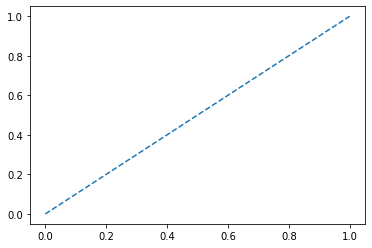

In [28]:
# plot on skill
plt.plot([0,1],[0,1],linestyle = '--')

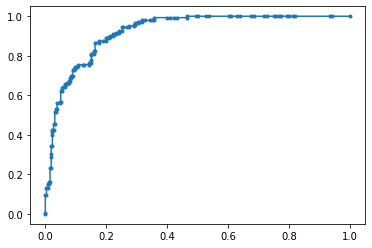

In [29]:
# plot the roc curve for the model
plt.plot(fpr,tpr,marker = '.')

In [30]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 7,
                             metric = 'minkowski',
                             p = 2)
model2.fit(X_train,y_train)

C:\Users\CZL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [31]:
# Preparing ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [38]:
# predict probabilities
probs= model2.predict_proba(features)
#keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
auc = roc_auc_score(label,probs)
print('AUC%.3f'%auc)

AUC0.923


In [39]:
# calculate roc curve
fpr,tpr,thresholds = roc_curve(label,probs)
print("True Positve Rate {}, False Positve Rate {}, Thresholds {}".format (tpr,fpr,thresholds))

True Positve Rate [0.         0.27972028 0.44055944 0.61538462 0.67832168 0.87412587
 0.95104895 1.         1.        ], False Positve Rate [0.         0.0077821  0.01945525 0.04280156 0.07392996 0.16731518
 0.32684825 0.58365759 1.        ], Thresholds [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

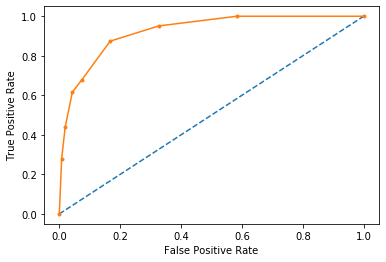

In [40]:
# plot no skill
plt.plot([0,1],[0,1],linestyle= '--')
#plot the roc curve for the model
plt.plot(fpr,tpr,marker = '.')
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')

In [43]:
# pricision recall curve for logistic regression 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

f1=0.734 auc=0.847 ap=0.848


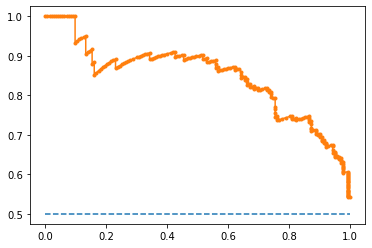

In [46]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [47]:
# Precision Recall curve for KNN
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

F1 = 0.749, auc = 0.871, avp = 0.841


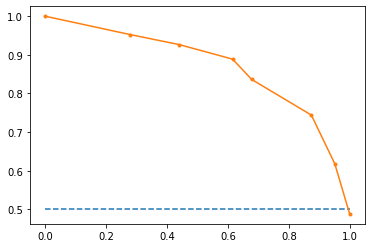

In [49]:
# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only 
probs = probs [:,1]
# Predict class values
y_hat = model2.predict(features)
# calculate precision_recall curve
precision , recall , thresholds = precision_recall_curve (label,probs)
# calculate F1 score
F1 = f1_score(label,y_hat)
# calculate precision_recall AUC
auc = auc (recall, precision)
# calculate average precision score
avp = average_precision_score(label,probs)
print('F1 = %.3f, auc = %.3f, avp = %.3f'%(F1,auc,avp))
# plot no skill 
plt.plot([0,1],[0.5,0.5],linestyle = '--')
# plot the presion_recall curve for model
plt.plot(recall,precision,marker = '.')